1-1. 탐색적 데이터 분석 수행(시각화 포함)

In [18]:
import pandas as pd
df = pd.read_csv('data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


모든 변수들이 수치형 변수로 구성되어 있음

In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치는 존재하지 않음

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


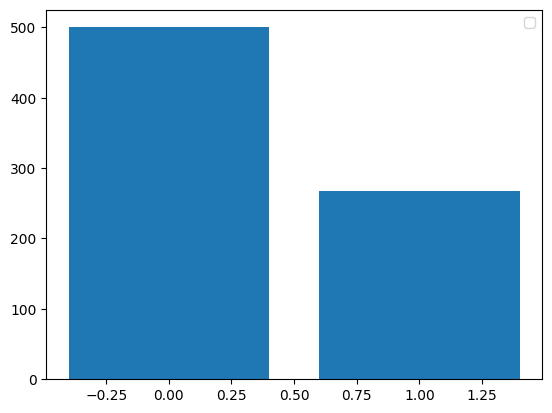

In [21]:
outcome = df['Outcome'].value_counts()
plt.bar(outcome.index, outcome.values, width=0.8, bottom=None,align='center')
plt.legend()
plt.show()

종속변수는 0과 1로 구성된 수치형 변수이기 때문에 분류 모델을 생성해야 한다.

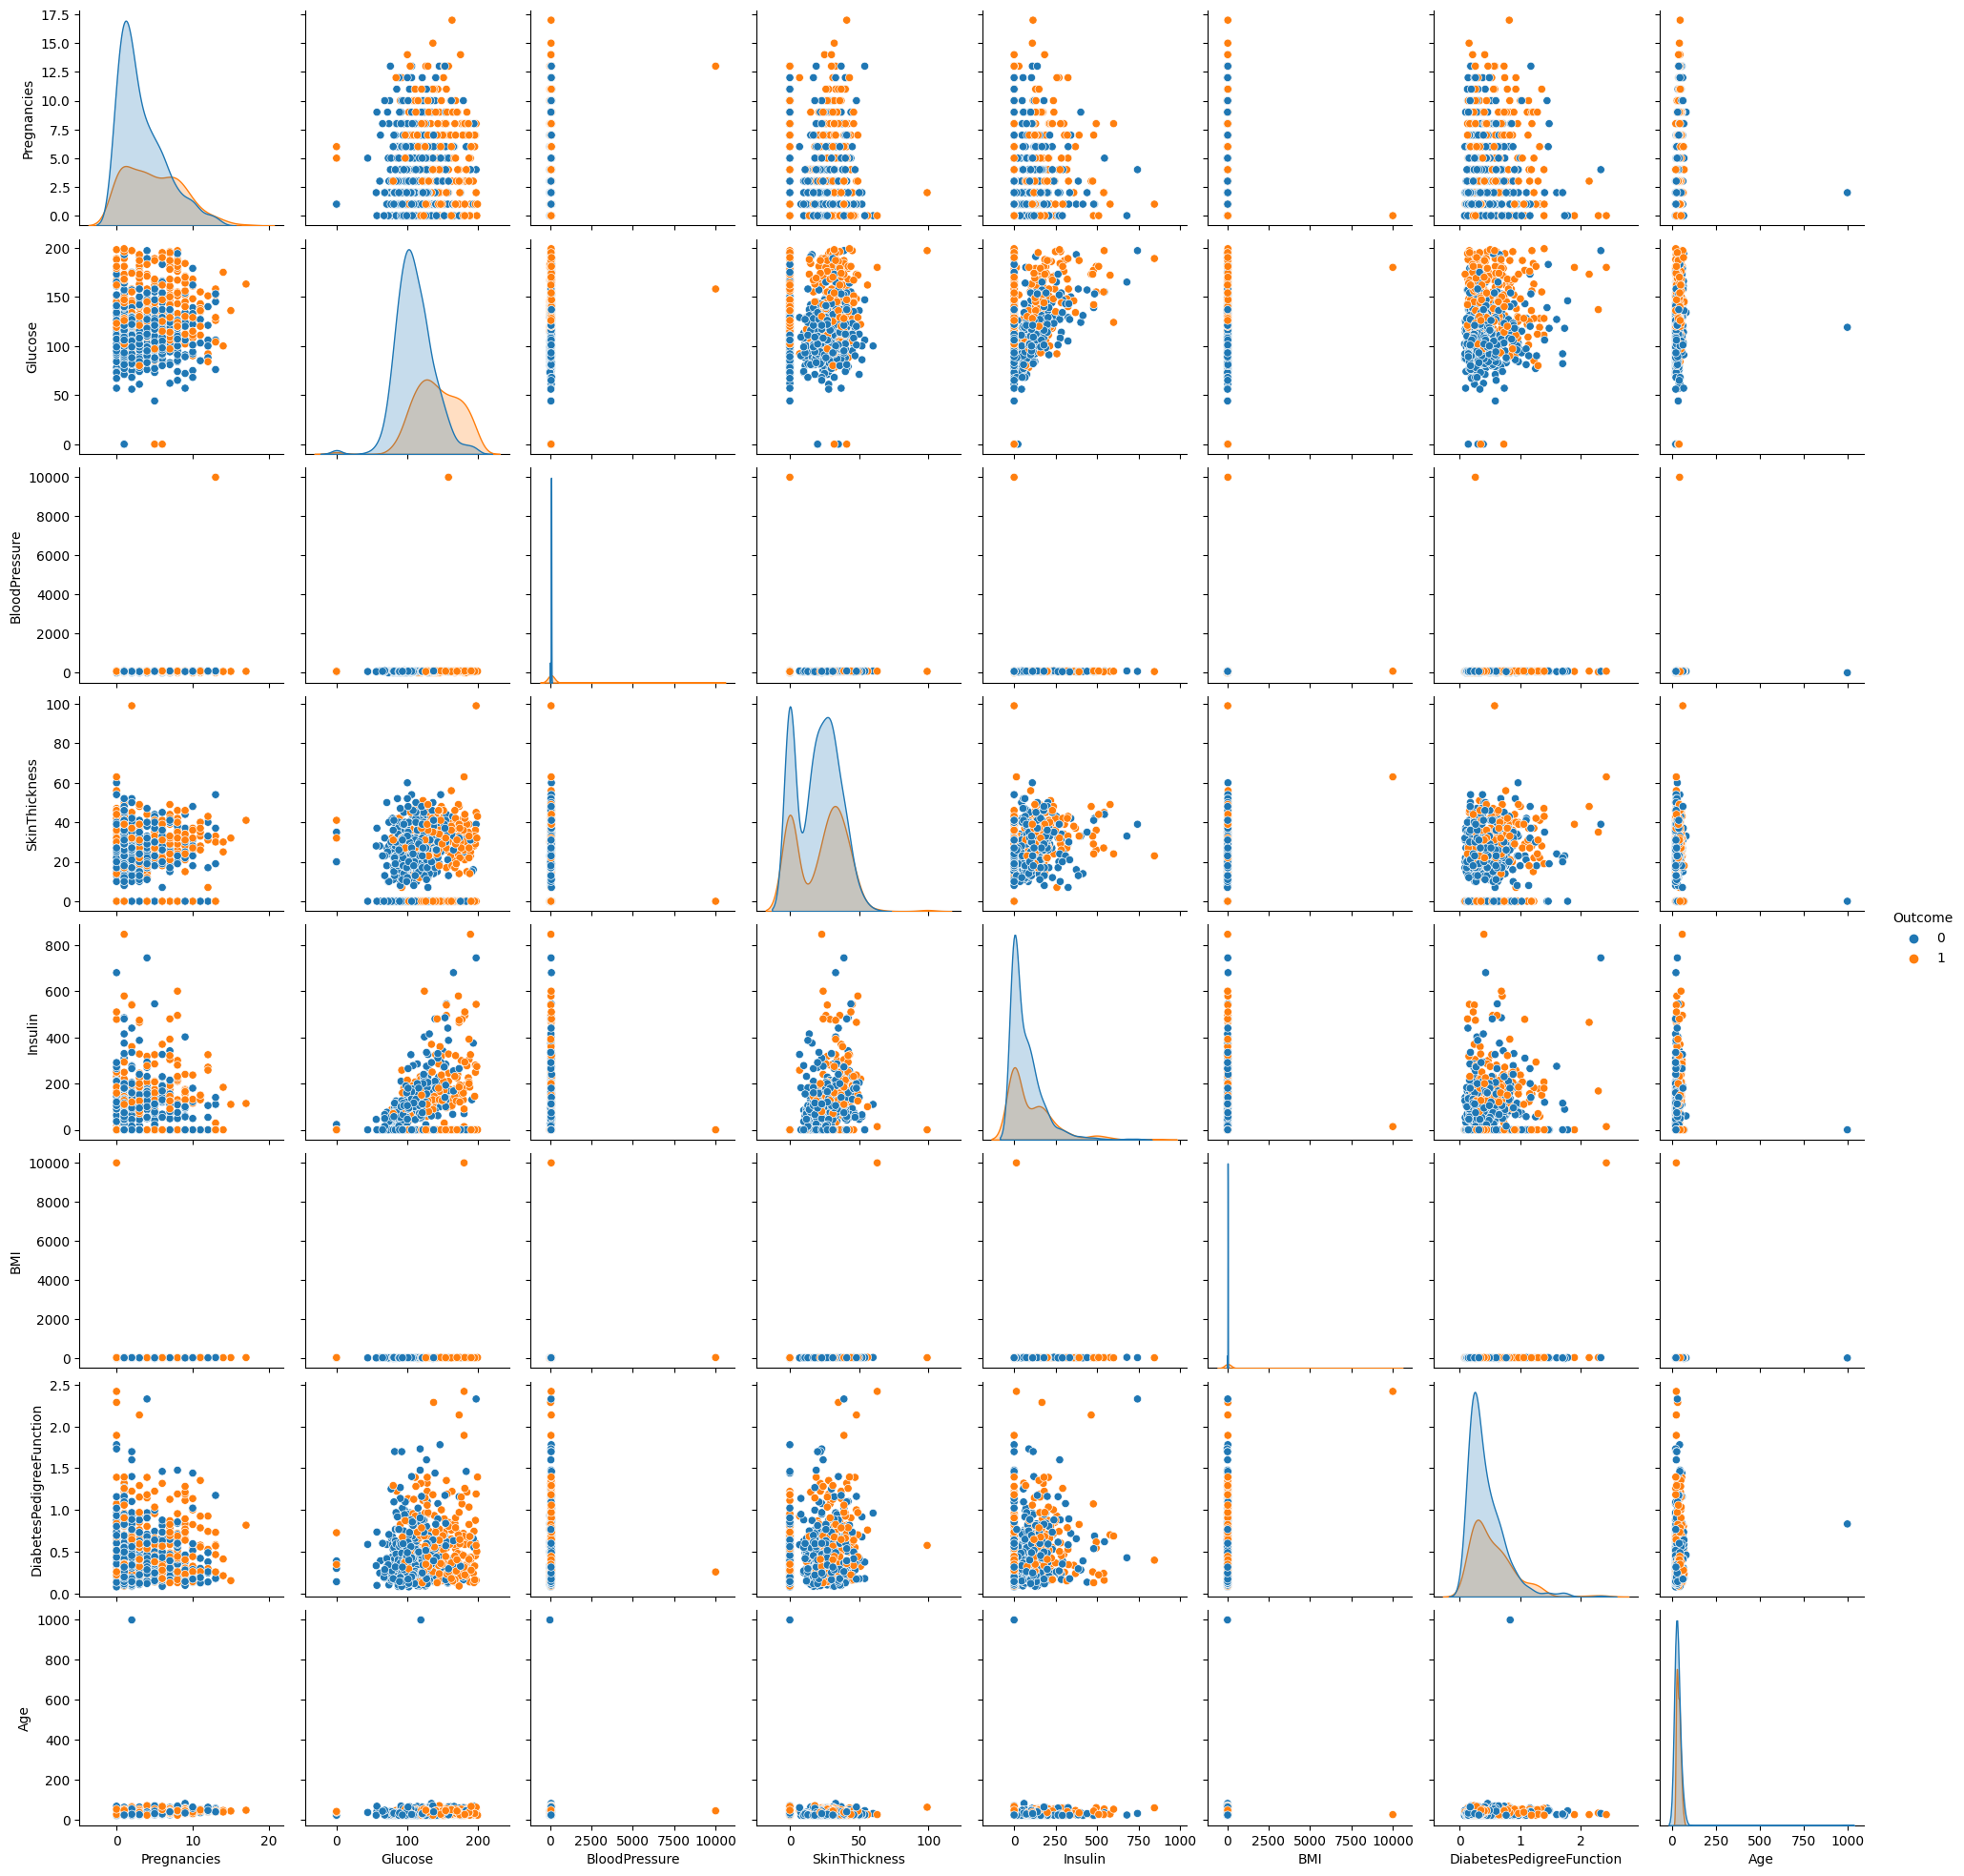

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(df,diag_kind = 'auto',hue='Outcome')
plt.show()

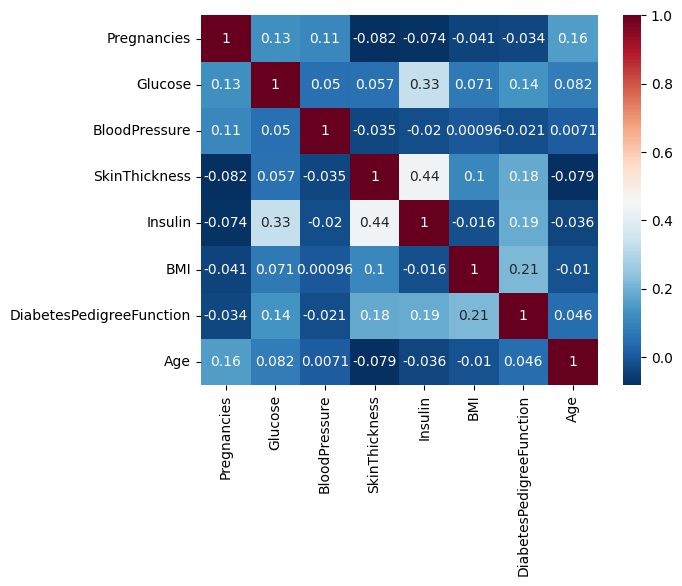

In [23]:
df_corr = df.drop(columns='Outcome').corr(method='pearson')
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,
            cmap='RdBu_r',annot=True)
plt.show()

변수들 간의 상관관계는 존재하지 않는 것으로 판단

1-2. 이상치 처리(대처방안 제시)

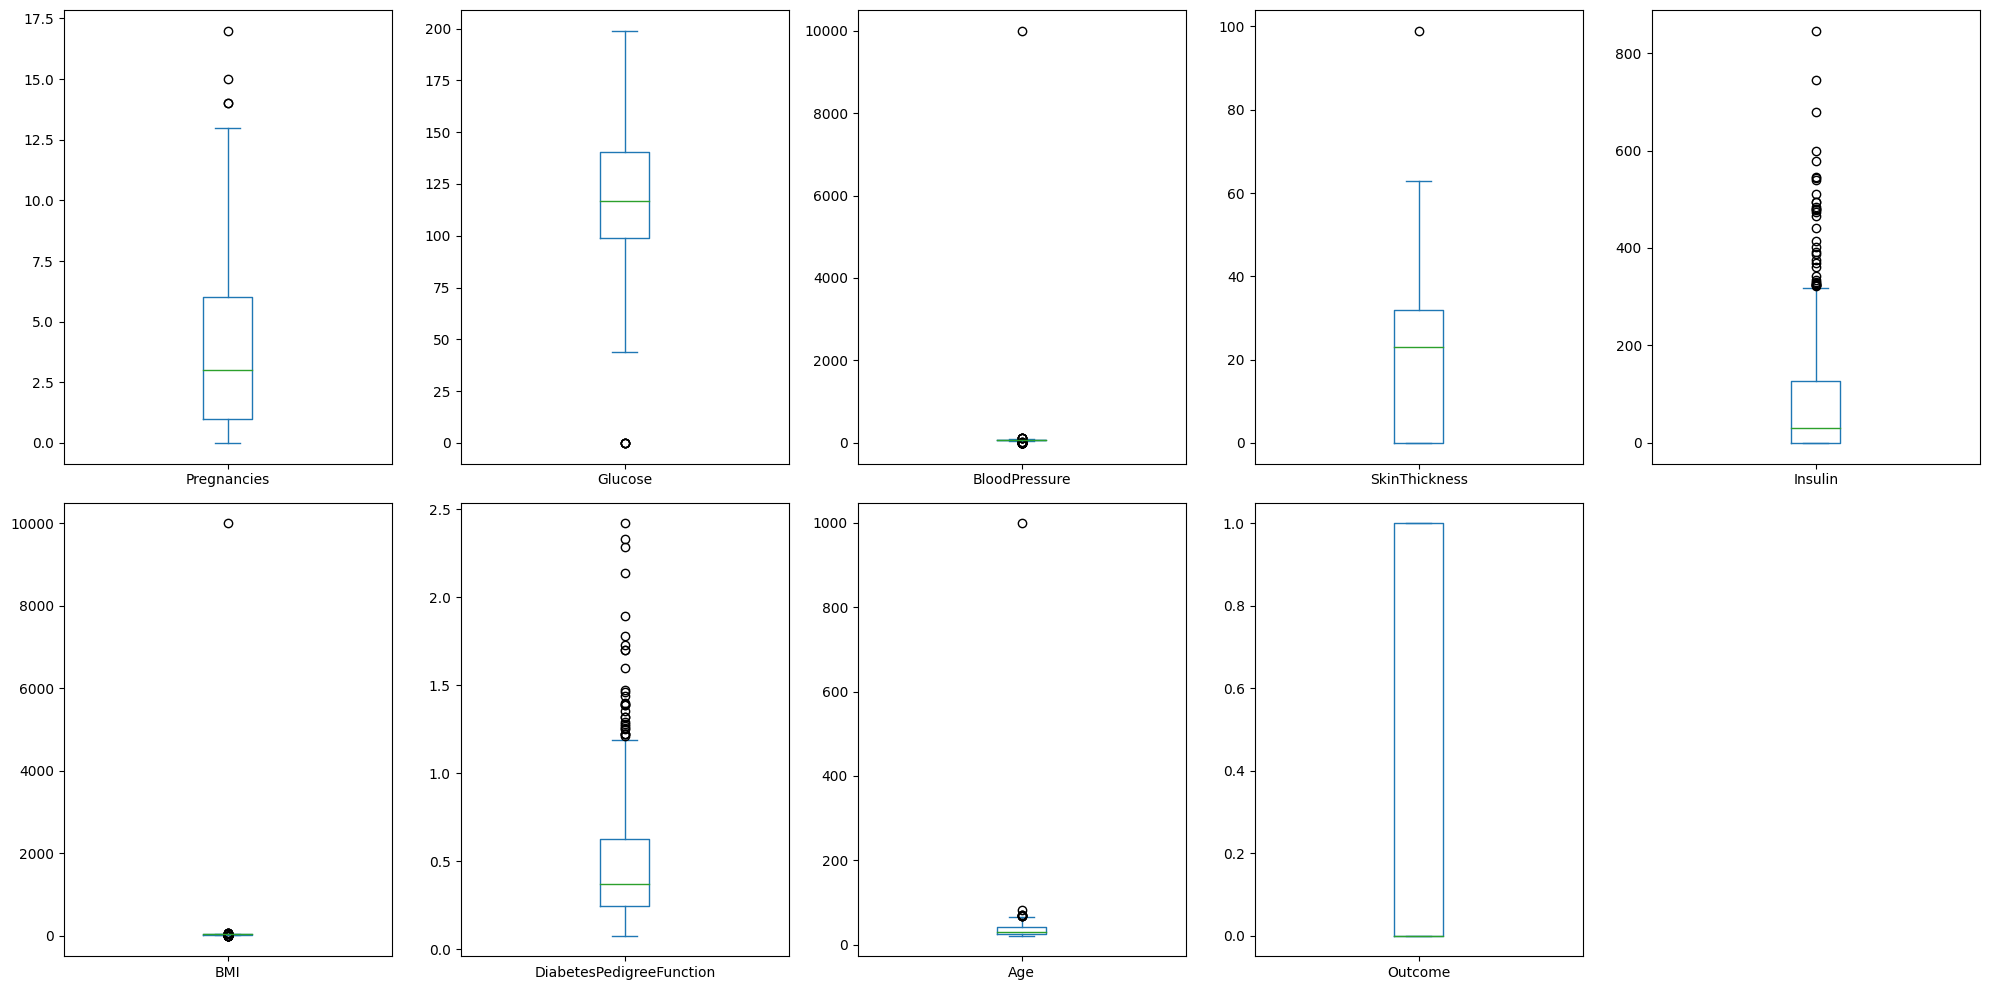

In [25]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10))
plt.tight_layout()
plt.show()

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


- Pregnancies : 임신 횟수가 10 이상인 열 삭제
- Age : 100세 이상 삭제
- 나머지 이상치들은 연속적으로 이어져 있어 실제로 이상치를 가진 사람이 있을 수 있으므로 현업의 의견이 필요할 것으로 판단됨
- BloodPressure와 Glucose 컬럼은 0이 존재하면 안된다고 판단

In [27]:
df = df[df['Pregnancies'] <10]
df = df[df['Age']<100]
df = df[df['BloodPressure']!=0]
df = df[df['Glucose'] != 0]

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.259644,121.771513,71.998516,21.424332,86.065282,46.920475,0.477111,32.483680,0.330861
std,2.668278,30.929311,12.367034,15.605303,118.764899,383.978161,0.334899,11.667911,0.470872
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.325000,0.246250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,49.500000,32.000000,0.382500,28.000000,0.000000
75%,5.000000,141.000000,80.000000,32.000000,131.500000,36.475000,0.630500,39.000000,1.000000
max,9.000000,199.000000,122.000000,99.000000,846.000000,9999.000000,2.420000,81.000000,1.000000


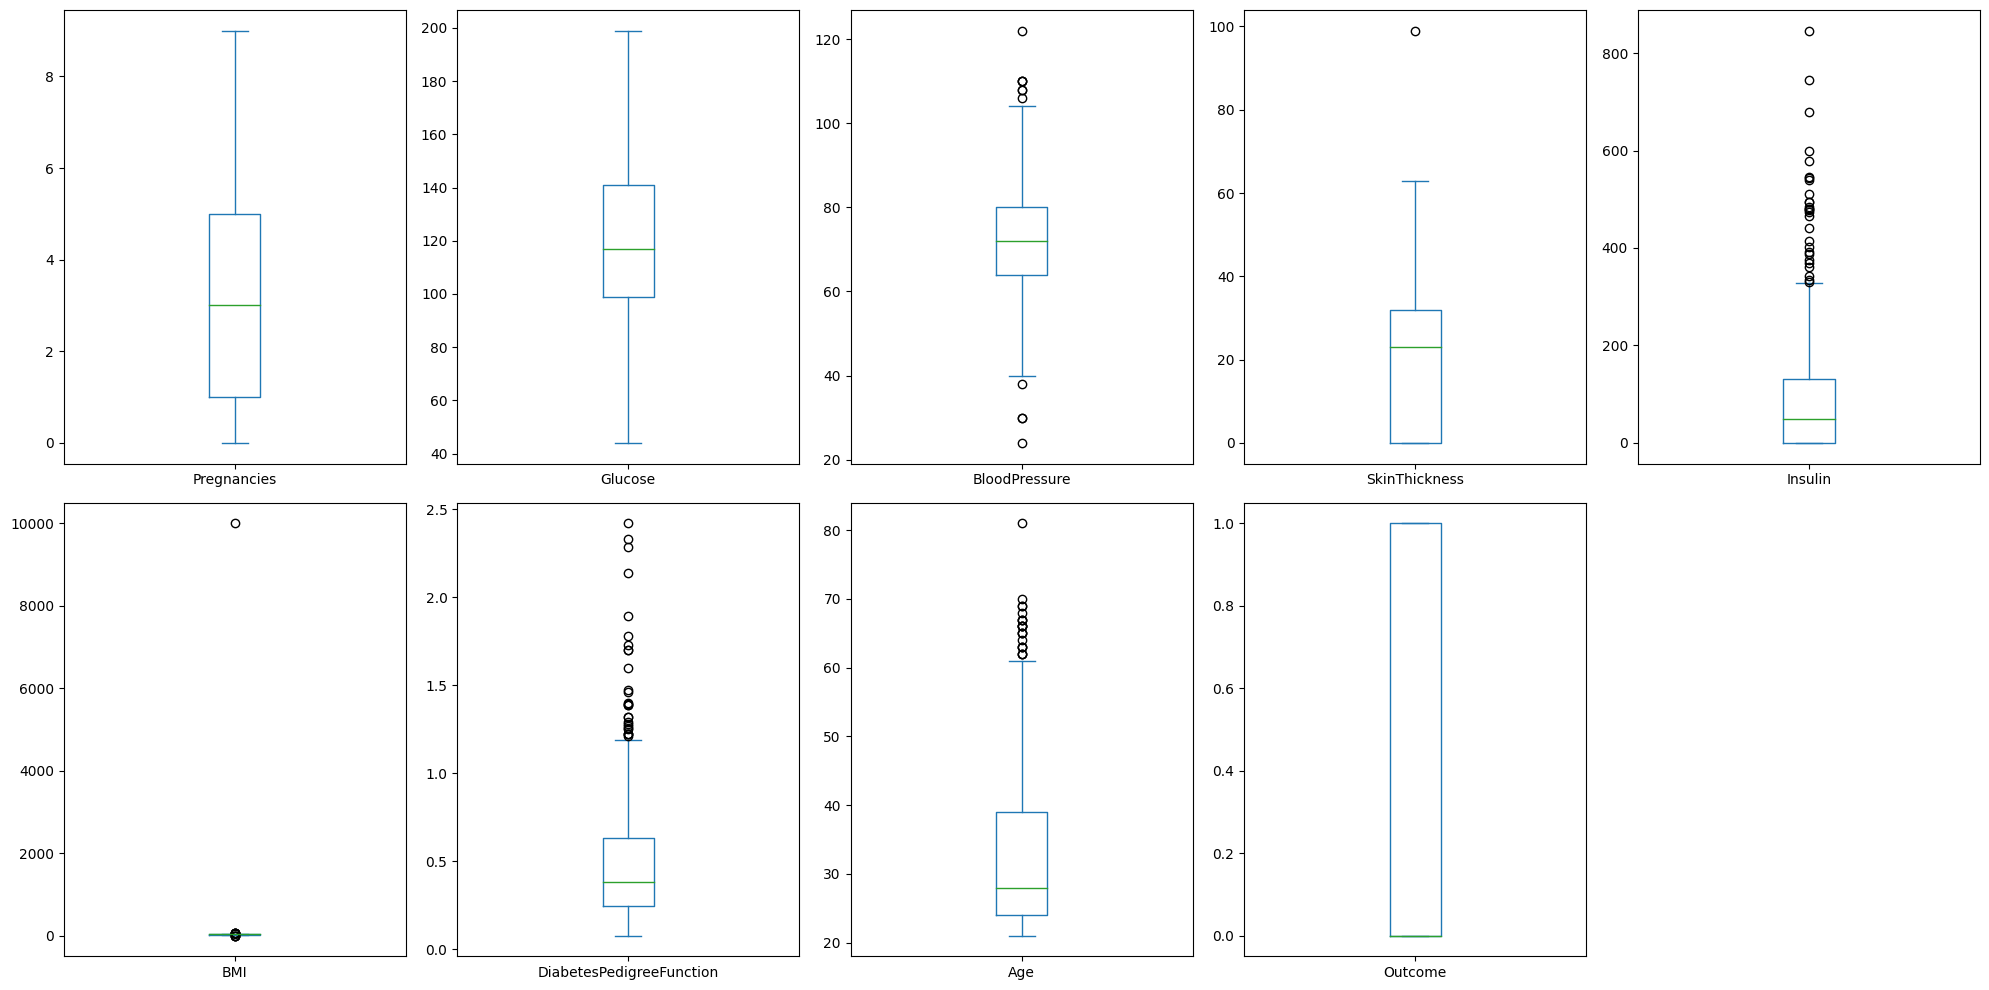

In [28]:
# 이상치 제거 후 박스플랏 시각화
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10))
plt.tight_layout()
plt.show()

이상치들이 존재하긴 하지만

1-3. 앞선 두 단계에서 얻느 향후 분석시 고려사항 작성

describe 함수를 보면 최솟값과 최댓값의 차이가 많이 나는 컬럼이 존재한다. 따라서 스케일링을 적용할 필요가 있어 보임

2-1. 오버 샘플링 과정 설명하고 결과작성

- Random OverSampling : 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터증식, 단순하게 복사하는 방식으로 기존의 데이터와 동일한 복제 데이터 생성, 소수 클래스에 과적합이 발생할 가능성이 있지만 사용 방법이 단순
- SMOTE : 적은 데이터셋에 있는 개별 데이터의 k-최근접 이웃을 찾아, 해당 데이터와 k개의 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터 생성, 처리 속도는 느리지만 과적합 문제를 예방할 수 있다. 

-> SMOTE 사용

In [29]:
df['Outcome'].value_counts()

0    451
1    223
Name: Outcome, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE()
x = df.drop(columns=['Outcome'])
y = df['Outcome']

x_sm , y_sm = smote.fit_resample(x,y)

print('원본 데이터 : \n',y.value_counts())
print('SMOTE : \n',y_sm.value_counts())

원본 데이터 : 
 0    451
1    223
Name: Outcome, dtype: int64
SMOTE : 
 1    451
0    451
Name: Outcome, dtype: int64


SMOTE 결과 0과 1의 비율이 1:1로 똑같아 진 것을 확인

2-2. 언더 샘플링 과정 설명하고 결과 작성

언더샘플링은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식으로 대표적으로 Random으로 다수의 클랫의 데이터를 선택하여 삭제하는 RandomUnderSampler, 서로 다른 클래스가 있을 때, 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수의 클래스의 데이터를 제거하는 토멕링크 방식이 있다.

In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x,y)

print('원본 데이터 : \n',y.value_counts())
print('SMOTE : \n',y_under.value_counts())

원본 데이터 : 
 0    451
1    223
Name: Outcome, dtype: int64
SMOTE : 
 0    223
1    223
Name: Outcome, dtype: int64


randomundersampling 결과, 클래스의 분포가 더 적은 쪽에 맞춰 데이터의 수가 변경됨

2-3. 둘 중 선택하고 이유 설명

데이터의 수가 많지 않기 때문에 Oversampling이 더 적합하다. Undersampling을 선택하게 될 경우 데이터의 수가 너무 적어져 과적합이 일어날 확률이 커지기 때문에 oversampling을 사용해 모델을 생성할 계획이다. 

3-1. 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)